In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [ ]:
# import matplotlib as mpl

# mpl.rcParams['axes.labelsize'] = 10
# mpl.rcParams['xtick.labelsize'] = 10
# mpl.rcParams['ytick.labelsize'] = 10
# mpl.rcParams['legend.fontsize'] = 10
# mpl.rcParams['font.family'] = ['sans-serif']
# mpl.rcParams['font.sans-serif'] = ['Arial']
# mpl.rcParams['text.usetex'] = False
# mpl.rcParams['svg.fonttype'] = 'none'

In [2]:
want_data = '_val' # _train, _val
use_smooth = False
save_fig = False

show_label_start = 0
show_label_end = 50

def lbound(x):
    a = []
    for i in x:
        a.append(max(0.0,i))
    return a
def hbound(x):
    a = []
    for i in x:
        a.append(min(1.0,i))
    return a

In [3]:
# #3
# if 'train' in want_data:
#     baseline_dl = [3.0672248363494874, 2.0803332328796387, 1.7949020624160767, 1.7071347951889038, 1.621921706199646, 1.5369055032730103, 1.3523767709732055, 1.2749360799789429, 1.1931744813919067, 1.1049942016601562, 1.0385116934776306, 1.0014891982078553, 0.9940191745758057, 0.9546535015106201, 0.938508939743042, 0.9254281520843506, 0.9343363046646118, 0.871056056022644, 0.9882755994796752, 1.079244899749756, 1.2892693758010865, 1.2471808671951294, 1.1611637592315673, 1.0199912667274476, 1.0202378511428833, 0.987574577331543, 0.9618734121322632, 0.9231496214866638, 0.9604886889457702, 0.9175866127014161, 0.8837426662445068, 0.8526713848114014, 0.8491066336631775, 0.8133334755897522, 0.8018217325210572, 0.76923668384552, 0.8731232643127441, 0.9334353685379029, 0.8765864729881286, 2.1877933144569397, 3.8357824325561523, 2.3774588346481322, 2.204478120803833, 1.9497739553451539, 1.6826263904571532, 1.5128344774246216, 1.4055516004562378, 1.3435624837875366, 1.288254404067993, 1.2516271352767945]
#     baseline_la = [3.0409350872039793, 1.9922634363174438, 1.8211431741714477, 1.7149097204208374, 1.7777654647827148, 1.6354859113693236, 1.2289344310760497, 1.002364182472229, 0.8677281498908996, 0.8848819613456727, 0.8348333239555359, 0.7801686763763428, 0.7309464097023011, 0.6519095659255981, 0.6581073880195618, 0.6154057502746582, 0.5850097179412842, 0.5558382749557496, 0.5338123202323913, 0.5070561408996582, 0.5008596420288086, 0.47870473861694335, 0.46977723836898805, 0.46505883932113645, 0.4516293406486511, 0.46046881675720214, 0.4798500955104828, 0.47292226552963257, 0.44953620433807373, 0.4418223321437836, 0.5976899266242981, 0.5547749876976014, 0.6060874581336975, 0.5743351936340332, 0.5717506051063538, 0.5174607157707214, 0.5090190231800079, 0.4878888249397278, 0.46597453355789187, 0.45630518794059755, 0.5653732538223266, 0.5527589917182922, 0.6415696263313293, 0.6269052624702454, 0.7092958688735962, 0.7198916673660278, 0.6398038029670715, 0.5778823614120483, 1.2661078691482544, 1.0201239824295043]
# else: 
#     baseline_dl = [2.5606112480163574, 1.857743501663208, 1.716707706451416, 1.6170933246612549, 1.5193346738815308, 1.4135005474090576, 1.2845996618270874, 1.2401764392852783, 1.1086359024047852, 1.049059271812439, 1.0301233530044556, 0.9543048739433289, 0.9652441143989563, 0.9463527202606201, 0.9138918519020081, 0.9350289702415466, 0.8744907975196838, 0.9266830682754517, 0.9360329508781433, 1.3052798509597778, 1.2236417531967163, 1.1383408308029175, 0.9469802379608154, 1.015748143196106, 0.9987155199050903, 0.9696723222732544, 0.9180466532707214, 0.9348840117454529, 0.9263982176780701, 0.8944846391677856, 0.898604154586792, 0.8393765687942505, 0.8396362066268921, 0.787118136882782, 0.7808432579040527, 0.794164776802063, 1.1118181943893433, 0.9712715744972229, 0.9005019664764404, 5.618534564971924, 1.7018749713897705, 2.294931173324585, 1.9503291845321655, 1.5759395360946655, 1.5968575477600098, 1.5301008224487305, 1.4114742279052734, 1.303666114807129, 1.2602688074111938, 1.2357559204101562]
#     baseline_la =[2.4165968894958496, 1.8727352619171143, 1.7776355743408203, 1.5777159929275513, 1.495706558227539, 1.3701245784759521, 1.1164336204528809, 0.9198742508888245, 0.8831514120101929, 0.8848333358764648, 0.8043299317359924, 0.7878543138504028, 0.7092644572257996, 0.6745765805244446, 0.6312328577041626, 0.6285661458969116, 0.5885769128799438, 0.5699411034584045, 0.542271614074707, 0.5289599299430847, 0.5217827558517456, 0.5094881057739258, 0.48970064520835876, 0.49104779958724976, 0.4865127205848694, 0.508530855178833, 0.5267782807350159, 0.49244439601898193, 0.47383028268814087, 0.7098146080970764, 0.5896097421646118, 0.7052298188209534, 0.56309974193573, 0.6127854585647583, 0.5241969227790833, 0.5568278431892395, 0.5040408968925476, 0.4973790645599365, 0.49431541562080383, 0.5881848335266113, 0.5352990627288818, 0.5683327913284302, 0.6251786947250366, 0.7378740310668945, 0.8211994171142578, 0.7380949854850769, 0.6082465052604675, 1.0088802576065063, 1.1532275676727295, 0.8543589115142822]

In [7]:
#2
if 'train' in want_data:
    baseline_dl = [3.293517827987671, 3.2150814056396486, 3.0138514041900635, 2.399050998687744, 1.8864464521408082, 1.8064842224121094, 1.7463931560516357, 1.6381738424301147, 1.4969715356826783, 1.3957726240158081, 1.298223328590393, 1.2042699575424194, 1.1134011030197144, 1.0262481451034546, 0.9534106016159057, 0.8913405776023865, 0.8298004388809204, 0.7795039176940918, 0.7452423930168152, 0.7183407664299011, 0.6882552027702331, 0.6635205864906311, 0.6544955492019653, 0.6354733109474182, 0.6234924674034119, 0.6254611372947693, 0.5957239031791687, 0.5882133722305298, 0.5702546954154968, 0.5598153114318848, 0.5454111933708191, 0.529938280582428, 0.5242432117462158, 0.5127673923969269, 0.5027211248874665, 0.5021922767162323, 0.5014163434505463, 0.48809821009635923, 0.48127795457839967, 0.4762150526046753, 0.46903948187828065, 0.45966736078262327, 0.4566409945487976, 0.4542220115661621, 0.44897828698158265, 0.43747310638427733, 0.4327620446681976, 0.41990514397621154, 0.4127758741378784, 0.41898673176765444]
    baseline_la = [3.2956568241119384, 3.212844705581665, 2.989592456817627, 2.239936947822571, 1.842091727256775, 1.7881028175354003, 1.634268832206726, 1.4559947729110718, 1.2969346046447754, 1.1557517051696777, 1.033458685874939, 0.9201012492179871, 0.833273184299469, 0.7750367760658264, 0.7287617802619935, 0.6902573823928833, 0.6611653089523315, 0.6263390302658081, 0.6055751800537109, 0.5863915324211121, 0.5730818748474121, 0.5526156902313233, 0.5392368793487549, 0.5263244867324829, 0.5164699256420135, 0.5045653522014618, 0.4972917020320892, 0.48681469559669494, 0.47102333307266236, 0.45419833064079285, 0.44474116563796995, 0.4300481677055359, 0.42491058111190794, 0.42480423450469973, 0.4298857688903809, 0.5005337774753571, 0.48475934863090514, 0.4255207061767578, 0.40199772715568544, 0.38063888549804686, 0.37821999192237854, 0.3693679869174957, 0.36293198466300963, 0.35757759809494016, 0.3520787239074707, 0.34620662331581115, 0.3432953655719757, 0.3420872211456299, 0.3375009119510651, 0.3358263850212097]
else: 
    baseline_dl = [3.2620506286621094, 3.144662857055664, 2.782257080078125, 2.0153934955596924, 1.8582189083099365, 1.7943456172943115, 1.7066031694412231, 1.55084228515625, 1.435892939567566, 1.3395229578018188, 1.2488529682159424, 1.1580077409744263, 1.0650396347045898, 0.9851482510566711, 0.9119371175765991, 0.8649606108665466, 0.8106685280799866, 0.7673366665840149, 0.7452459931373596, 0.7109582424163818, 0.686971127986908, 0.6797603964805603, 0.6487559676170349, 0.6425890326499939, 0.6648390889167786, 0.6170950531959534, 0.5934494137763977, 0.5853225588798523, 0.5734785795211792, 0.5568828582763672, 0.548161506652832, 0.535370945930481, 0.5235083699226379, 0.5140827894210815, 0.5097945332527161, 0.5075446367263794, 0.4940940737724304, 0.48243388533592224, 0.4807884991168976, 0.47951650619506836, 0.467181921005249, 0.45892569422721863, 0.4757235050201416, 0.44853857159614563, 0.43966811895370483, 0.43900665640830994, 0.4271604120731354, 0.4178186058998108, 0.4128786623477936, 0.43365657329559326]
    baseline_la = [3.2619190216064453, 3.135776996612549, 2.720820188522339, 1.896746039390564, 1.8113112449645996, 1.728922963142395, 1.5371465682983398, 1.3493694067001343, 1.1971272230148315, 1.0688691139221191, 0.9538275599479675, 0.8716318607330322, 0.8060386776924133, 0.7655373811721802, 0.7096623778343201, 0.6890769004821777, 0.6497524976730347, 0.6388217806816101, 0.616982102394104, 0.5950242877006531, 0.5755366683006287, 0.5584285259246826, 0.5484035015106201, 0.5401149988174438, 0.5228549838066101, 0.5105476379394531, 0.5059248805046082, 0.48306596279144287, 0.46855321526527405, 0.45611098408699036, 0.4376738667488098, 0.4314817786216736, 0.42419737577438354, 0.41419872641563416, 0.5395247340202332, 0.5512279868125916, 0.44640469551086426, 0.4363543689250946, 0.39609745144844055, 0.37791427969932556, 0.38822510838508606, 0.36967235803604126, 0.3765992224216461, 0.3590397834777832, 0.35893502831459045, 0.35449281334877014, 0.3484821617603302, 0.3473212420940399, 0.3464658558368683, 0.3485149145126343]

In [5]:
# #1
# if 'train' in want_data:
#     baseline_dl = [3.0672248363494874, 2.0803332328796387, 1.7949020624160767, 1.7071347951889038, 1.621921706199646, 1.5369055032730103, 1.3523767709732055, 1.2749360799789429, 1.1931744813919067, 1.1049942016601562, 1.0385116934776306, 1.0014891982078553, 0.9940191745758057, 0.9546535015106201, 0.938508939743042, 0.9254281520843506, 0.9343363046646118, 0.871056056022644, 0.9882755994796752, 1.079244899749756, 1.2892693758010865, 1.2471808671951294, 1.1611637592315673, 1.0199912667274476, 1.0202378511428833, 0.987574577331543, 0.9618734121322632, 0.9231496214866638, 0.9604886889457702, 0.9175866127014161, 0.8837426662445068, 0.8526713848114014, 0.8491066336631775, 0.8133334755897522, 0.8018217325210572, 0.76923668384552, 0.8731232643127441, 0.9334353685379029, 0.8765864729881286, 2.1877933144569397, 3.8357824325561523, 2.3774588346481322, 2.204478120803833, 1.9497739553451539, 1.6826263904571532, 1.5128344774246216, 1.4055516004562378, 1.3435624837875366, 1.288254404067993, 1.2516271352767945]
#     baseline_la = [3.0409350872039793, 1.9922634363174438, 1.8211431741714477, 1.7149097204208374, 1.7777654647827148, 1.6354859113693236, 1.2289344310760497, 1.002364182472229, 0.8677281498908996, 0.8848819613456727, 0.8348333239555359, 0.7801686763763428, 0.7309464097023011, 0.6519095659255981, 0.6581073880195618, 0.6154057502746582, 0.5850097179412842, 0.5558382749557496, 0.5338123202323913, 0.5070561408996582, 0.5008596420288086, 0.47870473861694335, 0.46977723836898805, 0.46505883932113645, 0.4516293406486511, 0.46046881675720214, 0.4798500955104828, 0.47292226552963257, 0.44953620433807373, 0.4418223321437836, 0.5976899266242981, 0.5547749876976014, 0.6060874581336975, 0.5743351936340332, 0.5717506051063538, 0.5174607157707214, 0.5090190231800079, 0.4878888249397278, 0.46597453355789187, 0.45630518794059755, 0.5653732538223266, 0.5527589917182922, 0.6415696263313293, 0.6269052624702454, 0.7092958688735962, 0.7198916673660278, 0.6398038029670715, 0.5778823614120483, 1.2661078691482544, 1.0201239824295043]
# else: 
#     baseline_dl = [2.5606112480163574, 1.857743501663208, 1.716707706451416, 1.6170933246612549, 1.5193346738815308, 1.4135005474090576, 1.2845996618270874, 1.2401764392852783, 1.1086359024047852, 1.049059271812439, 1.0301233530044556, 0.9543048739433289, 0.9652441143989563, 0.9463527202606201, 0.9138918519020081, 0.9350289702415466, 0.8744907975196838, 0.9266830682754517, 0.9360329508781433, 1.3052798509597778, 1.2236417531967163, 1.1383408308029175, 0.9469802379608154, 1.015748143196106, 0.9987155199050903, 0.9696723222732544, 0.9180466532707214, 0.9348840117454529, 0.9263982176780701, 0.8944846391677856, 0.898604154586792, 0.8393765687942505, 0.8396362066268921, 0.787118136882782, 0.7808432579040527, 0.794164776802063, 1.1118181943893433, 0.9712715744972229, 0.9005019664764404, 5.618534564971924, 1.7018749713897705, 2.294931173324585, 1.9503291845321655, 1.5759395360946655, 1.5968575477600098, 1.5301008224487305, 1.4114742279052734, 1.303666114807129, 1.2602688074111938, 1.2357559204101562]
#     baseline_la = [2.4165968894958496, 1.8727352619171143, 1.7776355743408203, 1.5777159929275513, 1.495706558227539, 1.3701245784759521, 1.1164336204528809, 0.9198742508888245, 0.8831514120101929, 0.8848333358764648, 0.8043299317359924, 0.7878543138504028, 0.7092644572257996, 0.6745765805244446, 0.6312328577041626, 0.6285661458969116, 0.5885769128799438, 0.5699411034584045, 0.542271614074707, 0.5289599299430847, 0.5217827558517456, 0.5094881057739258, 0.48970064520835876, 0.49104779958724976, 0.4865127205848694, 0.508530855178833, 0.5267782807350159, 0.49244439601898193, 0.47383028268814087, 0.7098146080970764, 0.5896097421646118, 0.7052298188209534, 0.56309974193573, 0.6127854585647583, 0.5241969227790833, 0.5568278431892395, 0.5040408968925476, 0.4973790645599365, 0.49431541562080383, 0.5881848335266113, 0.5352990627288818, 0.5683327913284302, 0.6251786947250366, 0.7378740310668945, 0.8211994171142578, 0.7380949854850769, 0.6082465052604675, 1.0088802576065063, 1.1532275676727295, 0.8543589115142822]

In [6]:
log_algo = 'deeplog'
fl_algo = 'fedavg_11'

dl_avg11_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_avg11_loss = np.sum([dl_avg11_loss, df['loss']], axis = 0)
    del df
    
dl_avg11_loss = dl_avg11_loss/5
###################################
log_algo = 'deeplog'
fl_algo = 'fedadam_11'

dl_adam11_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_adam11_loss = np.sum([dl_adam11_loss, df['loss']], axis = 0)
    del df
    
dl_adam11_loss = dl_adam11_loss/5
###################################
log_algo = 'deeplog'
fl_algo = 'fedavg_10e_11'

dl_avg_10e_11_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_avg_10e_11_loss = np.sum([dl_avg_10e_11_loss, df['loss']], axis = 0)
    del df
    
dl_avg_10e_11_loss = dl_avg_10e_11_loss/5
###################################
log_algo = 'deeplog'
fl_algo = 'fedadam_10e_11'

dl_adam_10e_11_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    dl_adam_10e_11_loss = np.sum([dl_adam_10e_11_loss, df['loss']], axis = 0)
    del df
    
dl_adam_10e_11_loss = dl_adam_10e_11_loss/5

In [7]:
log_algo = 'loganomaly'
fl_algo = 'fedavg_11'

la_avg11_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_avg11_loss = np.sum([la_avg11_loss, df['loss']], axis = 0)
    del df
    
la_avg11_loss = la_avg11_loss/5
###################################
log_algo = 'loganomaly'
fl_algo = 'fedadam_11'

la_adam11_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_adam11_loss = np.sum([la_adam11_loss, df['loss']], axis = 0)
    del df
    
la_adam11_loss = la_adam11_loss/5
###################################
log_algo = 'loganomaly'
fl_algo = 'fedavg_10e_11'

la_avg_10e_11_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_avg_10e_11_loss = np.sum([la_avg_10e_11_loss, df['loss']], axis = 0)
    del df
    
la_avg_10e_11_loss = la_avg_10e_11_loss/5
###################################
log_algo = 'loganomaly'
fl_algo = 'fedadam_10e_11'

la_adam_10e_11_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_adam_10e_11_loss = np.sum([la_adam_10e_11_loss, df['loss']], axis = 0)
    del df
    
la_adam_10e_11_loss = la_adam_10e_11_loss/5

In [8]:
log_algo = 'loganomaly'
fl_algo = 'fedavg_21'

la_avg12_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_avg12_loss = np.sum([la_avg12_loss, df['loss']], axis = 0)
    del df
    
la_avg12_loss = la_avg12_loss/5
###################################
log_algo = 'loganomaly'
fl_algo = 'fedadam_21'

la_adam12_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_adam12_loss = np.sum([la_adam12_loss, df['loss']], axis = 0)
    del df
    
la_adam12_loss = la_adam12_loss/5
###################################
log_algo = 'loganomaly'
fl_algo = 'fedavg_10e_12'

la_avg_10e_12_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_avg_10e_12_loss = np.sum([la_avg_10e_12_loss, df['loss']], axis = 0)
    del df
    
la_avg_10e_12_loss = la_avg_10e_12_loss/5
###################################
log_algo = 'loganomaly'
fl_algo = 'fedadam_10e_12'

la_adam_10e_12_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_adam_10e_12_loss = np.sum([la_adam_10e_12_loss, df['loss']], axis = 0)
    del df
    
la_adam_10e_12_loss = la_adam_10e_12_loss/5

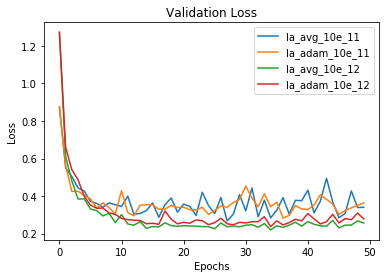

In [9]:
# ['dl_avg21', 'dl_adam31', 'la_avg21', 'la_adam31', 'la_avg11', 'la_adam11']

for i in ['la_avg_10e_11', 'la_adam_10e_11', 'la_avg_10e_12', 'la_adam_10e_12']:
    x = np.arange(show_label_start,show_label_end)
    exec('y = '+ i + '_loss[show_label_start:show_label_end]')
    
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/5))
        y = c(x)
        y = lbound(y)
#     if 'dl' in i:
#         if 'avg' in i:
#             plt.plot(x,y, label = 'DeepLog on Fedavg')
#         else:
#             plt.plot(x,y, label = 'DeepLog on FedAdam')
#     else:
#         if 'avg' in i:
#             plt.plot(x,y, label = 'LogAnonmaly on Fedavg')
#         else:
#             plt.plot(x,y, label = 'LogAnonmaly on FedAdam')
    plt.plot(x, y, label = i)
            
# x = np.arange(show_label_start,show_label_end)
# y = baseline_dl
# if use_smooth:
#     c = interp1d(x,y, kind = "cubic")
#     x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/5))
#     y = c(x)
#     y = lbound(y)            
# plt.plot(x, y, label = 'Baseline (DeepLog)')


# x = np.arange(show_label_start,show_label_end)
# y = baseline_la
# if use_smooth:
#     c = interp1d(x,y, kind = "cubic")
#     x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/5))
#     y = c(x)
#     y = lbound(y)  
# plt.plot(x, baseline_la, label = 'Baseline (LogAnomaly)')

plt.xlabel('Epochs')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('Validation Loss')
plt.legend()
if save_fig:
    plt.savefig('../result/fig/'+ want_data[1:] +'_loss.svg', bbox_inches='tight', format="svg")
plt.show()

In [10]:
use_smooth = False
save_fig = False

show_label_start = 0
show_label_end = 50

def lbound(x):
    a = []
    for i in x:
        a.append(max(0.0,i))
    return a
def hbound(x):
    a = []
    for i in x:
        a.append(min(100.0,i))
    return a

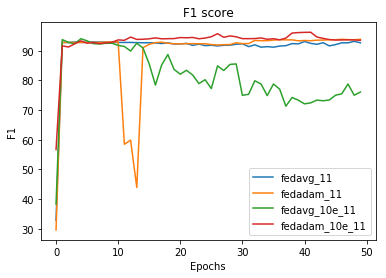

In [11]:
# string1 = '../result/deeplog/fedavg_11/f1.csv'
# string2 = '../result/deeplog/fedadam_11/f1.csv'
# string3 = '../result/deeplog/fedavg_10e_11/f1.csv'
# string4 = '../result/deeplog/fedadam_10e_11/f1.csv'

string1 = '../result/loganomaly/fedavg_11/f1.csv'
string2 = '../result/loganomaly/fedadam_11/f1.csv'
string3 = '../result/loganomaly/fedavg_10e_11/f1.csv'
string4 = '../result/loganomaly/fedadam_10e_11/f1.csv'

# string1 = '../result/loganomaly/fedavg_21/f1.csv'
# string2 = '../result/loganomaly/fedadam_21/f1.csv'
# string3 = '../result/loganomaly/fedavg_10e_12/f1.csv'
# string4 = '../result/loganomaly/fedadam_10e_12/f1.csv'

for i in range(1,5):
    exec('string = string' + str(i))
    df = pd.read_csv(string, header = None)
    df = np.mean(np.array(df), axis = 0)
    y = np.array(df[1:])
    
    del df
    x = np.arange(50)
    
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/5))
        y = c(x)
        y = hbound(y)
    
    plt.plot(x, y, label = string[21:-7])
#     if 'deep' in string:
#         if 'avg' in string:
#             plt.plot(x,y, label = 'DeepLog on Fedavg' )
#         else:
#             plt.plot(x,y, label = 'DeepLog on FedAdam')
#     else:
#         if 'avg' in string:
#             plt.plot(x,y, label = 'LogAnonmaly on Fedavg')
#         else:
#             plt.plot(x,y, label = 'LogAnonmaly on FedAdam')


plt.xlabel('Epochs')
plt.ylabel('F1')
plt.title('F1 score')
plt.legend()
if save_fig:
    plt.savefig('../result/fig/F1.svg', bbox_inches='tight', format="svg")
plt.show()

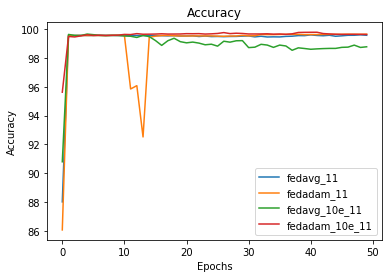

In [12]:
# string1 = '../result/deeplog/fedavg_11/acc.csv'
# string2 = '../result/deeplog/fedadam_11/acc.csv'
# string3 = '../result/deeplog/fedavg_10e_11/acc.csv'
# string4 = '../result/deeplog/fedadam_10e_11/acc.csv'

string1 = '../result/loganomaly/fedavg_11/acc.csv'
string2 = '../result/loganomaly/fedadam_11/acc.csv'
string3 = '../result/loganomaly/fedavg_10e_11/acc.csv'
string4 = '../result/loganomaly/fedadam_10e_11/acc.csv'

# string1 = '../result/loganomaly/fedavg_21/acc.csv'
# string2 = '../result/loganomaly/fedadam_21/acc.csv'
# string3 = '../result/loganomaly/fedavg_10e_12/acc.csv'
# string4 = '../result/loganomaly/fedadam_10e_12/acc.csv'

for i in range(1,5):
    exec('string = string' + str(i))
    df = pd.read_csv(string, header = None)
    df = np.mean(np.array(df), axis = 0)
    y = np.array(df[1:])
    
    del df
    x = np.arange(50)
    
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/5))
        y = c(x)
        y = hbound(y)
        
    plt.plot(x, y, label = string[21:-8])
#     if 'deep' in string:
#         if 'avg' in string:
#             plt.plot(x,y, label = 'DeepLog on Fedavg')
#         else:
#             plt.plot(x,y, label = 'DeepLog on FedAdam')
#     else:
#         if 'avg' in string:
#             plt.plot(x,y, label = 'LogAnonmaly on Fedavg')
#         else:
#             plt.plot(x,y, label = 'LogAnonmaly on FedAdam')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
if save_fig:
    plt.savefig('../result/fig/Acc.svg', bbox_inches='tight', format="svg")
plt.show()

# 加入SL前後比較

In [18]:
show_label_start = 0
show_label_end = 50

want_data = '_val'
use_smooth = False
save_fig = False

def lbound(x):
    a = []
    for i in x:
        a.append(max(0.0,i))
    return a
def hbound(x):
    a = []
    for i in x:
        a.append(min(100.0,i))
    return a

In [19]:
dl_adam12_loss = np.zeros(shape=(50))
dlsl_adam12_loss = np.zeros(shape=(50))
dl_avg12_loss = np.zeros(shape=(50))
dlsl_avg12_loss = np.zeros(shape=(50))


la_adam12_loss = np.zeros(shape=(50))
lasl_adam12_loss = np.zeros(shape=(50))
la_avg12_loss = np.zeros(shape=(50))
lasl_avg12_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/deeplog/fedadam_10e_12/client_' + str(i) + want_data + '_log.csv'
    df = pd.read_csv(string)
    dl_adam12_loss = np.sum([dl_adam12_loss, df['loss']], axis = 0)
    del df
    
    
dl_adam12_loss = dl_adam12_loss/5

for i in range(1,6):
    string = '../result/deeplog_sl/fedadam_10e_12/client_' + str(i) + want_data + '_log.csv'
    df = pd.read_csv(string)
    dlsl_adam12_loss = np.sum([dlsl_adam12_loss, df['loss']], axis = 0)
    del df
    
dlsl_adam12_loss = dlsl_adam12_loss/5

for i in range(1,6):
    string = '../result/deeplog/fedavg_21/client_' + str(i) + want_data + '_log.csv'
    df = pd.read_csv(string)
    dl_avg12_loss = np.sum([dl_avg12_loss, df['loss']], axis = 0)
    del df
    
    
dl_avg12_loss = dl_avg12_loss/5

for i in range(1,6):
    string = '../result/deeplog_sl/fedavg_10e_12/client_' + str(i) + want_data + '_log.csv'
    df = pd.read_csv(string)
    dlsl_avg12_loss = np.sum([dlsl_avg12_loss, df['loss']], axis = 0)
    del df
    
dlsl_avg12_loss = dlsl_avg12_loss/5


# ========================================

for i in range(1,6):
    string = '../result/loganomaly/fedadam_10e_12/client_' + str(i) + want_data + '_log.csv'
    df = pd.read_csv(string)
    la_adam12_loss = np.sum([la_adam12_loss, df['loss']], axis = 0)
    del df
    
    
la_adam12_loss = la_adam12_loss/5

for i in range(1,6):
    string = '../result/loganomaly_sl/fedadam_10e_12/client_' + str(i) + want_data + '_log.csv'
    df = pd.read_csv(string)
    lasl_adam12_loss = np.sum([lasl_adam12_loss, df['loss']], axis = 0)
    del df
    
lasl_adam12_loss = lasl_adam12_loss/5

for i in range(1,6):
    string = '../result/loganomaly/fedavg_10e_12/client_' + str(i) + want_data + '_log.csv'
    df = pd.read_csv(string)
    la_avg12_loss = np.sum([la_avg12_loss, df['loss']], axis = 0)
    del df
    
    
la_avg12_loss = la_avg12_loss/5

for i in range(1,6):
    string = '../result/loganomaly_sl/fedavg_10e_12/client_' + str(i) + want_data + '_log.csv'
    df = pd.read_csv(string)
    lasl_avg12_loss = np.sum([lasl_avg12_loss, df['loss']], axis = 0)
    del df
    
lasl_avg12_loss = lasl_avg12_loss/5

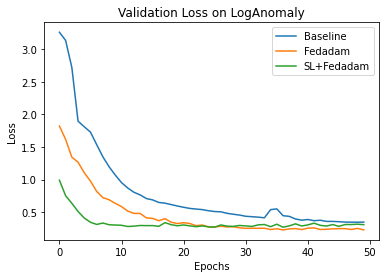

In [20]:
name = ['Fedadam', 'SL+Fedadam']
method = ['la_adam12', 'lasl_adam12']


x = np.arange(show_label_start,show_label_end)
y = baseline_la
plt.plot(x, y, label = 'Baseline')

for i in range(2):
    x = np.arange(show_label_start,show_label_end)
    exec('y = '+ method[i] + '_loss[show_label_start:show_label_end]')
    
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/2))
        y = c(x)
        y = lbound(y)
    plt.plot(x, y, label = name[i])
            
plt.xlabel('Epochs')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('Validation Loss on LogAnomaly')
plt.legend()
if save_fig:
    plt.savefig('../result/fig/sl_la'+ want_data[1:] +'_loss.svg', bbox_inches='tight', format="svg")
plt.show()

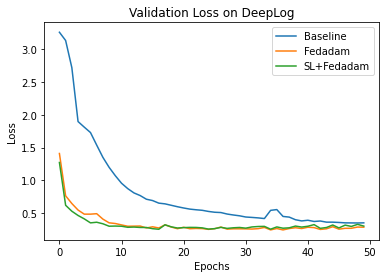

In [21]:
name = ['Fedadam', 'SL+Fedadam']
method = ['dl_adam12', 'dlsl_adam12']


x = np.arange(show_label_start,show_label_end)
y = baseline_la
plt.plot(x, y, label = 'Baseline')

for i in range(2):
    x = np.arange(show_label_start,show_label_end)
    exec('y = '+ method[i] + '_loss[show_label_start:show_label_end]')
    
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/2))
        y = c(x)
        y = lbound(y)
    plt.plot(x, y, label = name[i])
            
plt.xlabel('Epochs')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('Validation Loss on DeepLog')
plt.legend()
if save_fig:
    plt.savefig('../result/fig/sl_dl'+ want_data[1:] +'_loss.svg', bbox_inches='tight', format="svg")
plt.show()

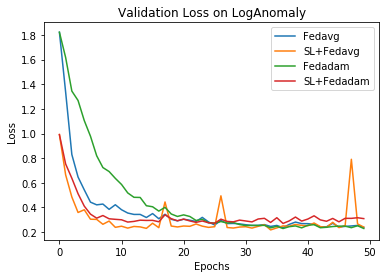

In [6]:
name = ['Fedavg', 'SL+Fedavg', 'Fedadam', 'SL+Fedadam']
method = ['la_avg12', 'lasl_avg12', 'la_adam12', 'lasl_adam12']

for i in range(4):
    x = np.arange(show_label_start,show_label_end)
    exec('y = '+ method[i] + '_loss[show_label_start:show_label_end]')
    
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/2))
        y = c(x)
        y = lbound(y)
    plt.plot(x, y, label = name[i])
            
plt.xlabel('Epochs')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('Validation Loss on LogAnomaly')
plt.legend()
if save_fig:
    plt.savefig('../result/fig/sl_la'+ want_data[1:] +'_loss.svg', bbox_inches='tight', format="svg")
plt.show()

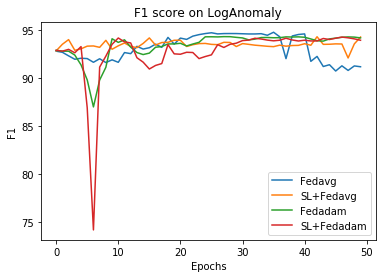

In [85]:
string1 = '../result/loganomaly/fedavg_10e_12/f1.csv'
string2 = '../result/loganomaly_sl/fedavg_10e_12/f1.csv'
string3 = '../result/loganomaly/fedadam_10e_12/f1.csv'
string4 = '../result/loganomaly_sl/fedadam_10e_12/f1.csv'

name = ['Fedavg', 'SL+Fedavg','Fedadam', 'SL+Fedadam']

for i in range(1,5):
    exec('string = string' + str(i))
    df = pd.read_csv(string, header = None)
    df = np.mean(np.array(df), axis = 0)
    y = np.array(df[1:])
    
    del df
    x = np.arange(50)
    
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/5))
        y = c(x)
        y = hbound(y)
    
    plt.plot(x, y, label = name[i-1])
#     if 'deep' in string:
#         if 'avg' in string:
#             plt.plot(x,y, label = 'DeepLog on Fedavg' )
#         else:
#             plt.plot(x,y, label = 'DeepLog on FedAdam')
#     else:
#         if 'avg' in string:
#             plt.plot(x,y, label = 'LogAnonmaly on Fedavg')
#         else:
#             plt.plot(x,y, label = 'LogAnonmaly on FedAdam')


plt.xlabel('Epochs')
plt.ylabel('F1')
plt.title('F1 score on LogAnomaly')
plt.legend()
if save_fig:
    plt.savefig('../result/fig/sl_la_F1.svg', bbox_inches='tight', format="svg")
plt.show()

In [94]:
la_adam12_loss = np.zeros(shape=(50))
lasl_adam12_loss = np.zeros(shape=(50))

dl_adam12_loss = np.zeros(shape=(50))
dlsl_adam12_loss = np.zeros(shape=(50))


for i in range(1,6):
    string = '../result/loganomaly_sl/fedadam_1e_12/client_' + str(i) + want_data + '_log.csv'
    df = pd.read_csv(string)
    la_adam12_loss = np.sum([la_adam12_loss, df['loss']], axis = 0)
    del df
    
    
la_adam12_loss = la_adam12_loss/5

for i in range(1,6):
    string = '../result/loganomaly_sl/fedadam_10e_12/client_' + str(i) + want_data + '_log.csv'
    df = pd.read_csv(string)
    lasl_adam12_loss = np.sum([lasl_adam12_loss, df['loss']], axis = 0)
    del df
    
lasl_adam12_loss = lasl_adam12_loss/5

# ==============================

for i in range(1,6):
    string = '../result/deeplog_sl/fedadam_1e_12/client_' + str(i) + want_data + '_log.csv'
    df = pd.read_csv(string)
    dl_adam12_loss = np.sum([dl_adam12_loss, df['loss']], axis = 0)
    del df
    
    
dl_adam12_loss = dl_adam12_loss/5

for i in range(1,6):
    string = '../result/deeplog_sl/fedadam_10e_12/client_' + str(i) + want_data + '_log.csv'
    df = pd.read_csv(string)
    dlsl_adam12_loss = np.sum([dlsl_adam12_loss, df['loss']], axis = 0)
    del df
    
dlsl_adam12_loss = dlsl_adam12_loss/5

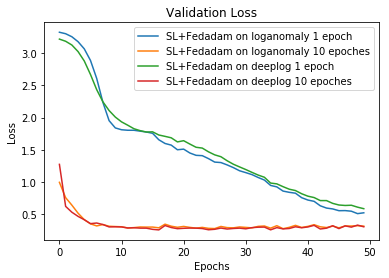

In [95]:
name = ['SL+Fedadam on loganomaly 1 epoch', 'SL+Fedadam on loganomaly 10 epoches', 'SL+Fedadam on deeplog 1 epoch', 'SL+Fedadam on deeplog 10 epoches']
method = ['la_adam12', 'lasl_adam12', 'dl_adam12', 'dlsl_adam12']

for i in range(4):
    x = np.arange(show_label_start,show_label_end)
    exec('y = '+ method[i] + '_loss[show_label_start:show_label_end]')
    
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/2))
        y = c(x)
        y = lbound(y)
    plt.plot(x, y, label = name[i])
            
plt.xlabel('Epochs')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('Validation Loss')
plt.legend()
if save_fig:
    plt.savefig('../result/fig/sl_diff_epoch'+ want_data[1:] +'_loss.svg', bbox_inches='tight', format="svg")
plt.show()

In [5]:
string = '../result/deeplog_sl/fedavg_10e_12/f1.csv'

df = pd.read_csv(string, header = None)
df = np.mean(np.array(df), axis = 0)
y = np.array(df[1:])

del df
print(y[-1])

# string = '../result/loganomaly_sl/fedadam_1e_12/precision.csv'

# df = pd.read_csv(string, header = None)
# df = np.mean(np.array(df), axis = 0)
# y = np.array(df[1:])

# del df
# print(y[-1])

94.40426904551732


# DP visualization

In [9]:
from _utils import clip_generator, add_noise_generator
import torch 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

group = {'noise_scale':0.1, 'norm_bound':0}
clip = clip_generator(norm_bound=group['norm_bound'])
add_noise = add_noise_generator(noise_scale=group['noise_scale'] * group['norm_bound'])


mu, sigma = 0, 0.2
# sss = torch.normal(mu, sigma, size=(1,10))
sss = torch.rand(1,10)
# sss = torch.tensor(np.random.normal(mu, sigma, 10))
# print(sss)

sss_dp = add_noise(clip(sss))
# print(sss)

sss = sss.cpu().detach().numpy()
sss_dp = sss_dp.cpu().detach().numpy()
print(sss)
print(sss_dp)

[[0.7481074  0.59199584 0.6873615  0.52584666 0.5878179  0.1277501
  0.00374722 0.94159985 0.9658966  0.03288072]]
[[0.7481074  0.59199584 0.6873615  0.52584666 0.5878179  0.1277501
  0.00374722 0.94159985 0.9658966  0.03288072]]


In [145]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(sss)
# sss_1 = pca.transform(sss)
# sss_2 = pca.transform(sss_dp)

# plt.scatter(sss_1[:, 0], sss_1[:, 1], c = 'b')
# plt.scatter(sss_2[:, 0], sss_2[:, 1], c = 'r', alpha = 0.2)

# plt.plot()

[]

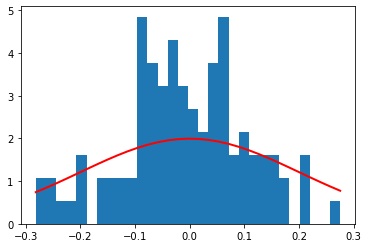

In [134]:
count, bins, ignored = plt.hist(sss, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.plot()

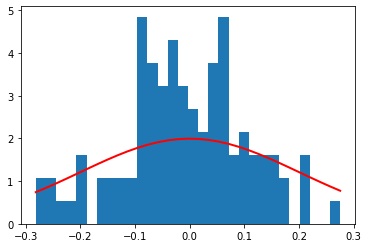

In [135]:
count_dp, bins_dp, ignored_dp = plt.hist(sss_dp, 30, density=True)
plt.plot(bins_dp, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins_dp - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

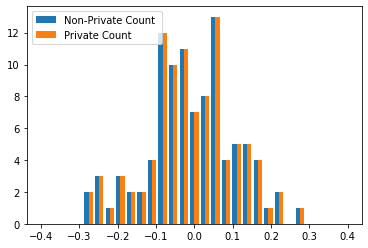

In [136]:
bins = np.linspace(-0.4, 0.4,30)

plt.hist([sss, sss_dp], bins, label=['Non-Private Count ', 'Private Count'])
plt.legend(loc='upper left')
plt.show()